### **PREDICTION OF JUSTIFICATION FOR VIOLENCE AGAINST WOMEN**

### ***LIFE CYCLE OF MACHINE LEARNING PROJECT***
- Understanding Problem Statement
- Data Collection
- Data checks to perform
- Exploratory Data Analysis
- Data pre-processing
- Model training
- Choose the best model

### **1. Problem Statement**
This project predicts public justification of violence against women based on demographic and cultural factors using machine learning.
The study identifies the most influential demographic factors, evaluates multiple regression models, and enhances prediction accuracy through model tuning.

### **2. Data Collection**

- Source : https://www.kaggle.com/code/gpreda/violence-against-women-and-girls
- The dataset has 8 columns and 12600 rows

### 2.1 Import Data and Required Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import CSV Data as Python DataFrame

In [20]:
df=pd.read_csv("violence_data.csv")
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


### Shape Of Dataset

In [21]:
df.shape

(12600, 8)

#### 2.2 Dataset Information
There are 5 demographics questions:

- Age (15-24, 25-34, 35-49)
- Education (No Education, Primary, Secondary, Higher)
- Employement (Unemployed, Employed for cash, Employed for kind)
- Marital status (Maried or living together, Widowed, divorced, separated, Never Married)
- Residence (Rural, Urban)

### **3. Data Checks To Perform**
- Check missing value
- Check duplicates
- Check Data Type
- Check Number of Unique Values for each column
- Check statistics of dataset
- Check various categories present in different categorical columns

### 3.1 Check Missing Value

In [22]:
df.isnull().sum()

RecordID                    0
Country                     0
Gender                      0
Demographics Question       0
Demographics Response       0
Question                    0
Survey Year                 0
Value                    1413
dtype: int64

#### Insight
- Except Value, each column has no missing value

#### Filling the missing values with the median of the rest of the values

In [23]:
df['Value']=df['Value'].fillna(df['Value'].median())

### 3.2 Check Duplicates


In [24]:
df.duplicated().sum()

np.int64(0)

#### Insight
- There is no duplicate in the dataset.


### 3.3 Check Data Types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  12600 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


### 3.4 Checking the number of unique values of each column

In [26]:
df.nunique()

RecordID                 420
Country                   70
Gender                     2
Demographics Question      5
Demographics Response     15
Question                   6
Survey Year               18
Value                    757
dtype: int64

### 3.5 Statistics of data

In [27]:
df.describe()

,RecordID,Value
count,12600.000000,12600.000000
mean,210.500000,19.217238
std,121.248024,16.078969
min,1.000000,0.000000
25%,105.750000,7.100000
50%,210.500000,14.900000
75%,315.250000,26.800000
max,420.000000,86.900000


### 3.6 Exploring Data


#### Violence justification distribution per demographic group


In [28]:
demographics_df = df.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
demographics_df.columns = ["Question", "Response", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per demographic group")
demographics_df.sort_values(["Question", "Median"])

Violence % median, min, max, and mean per demographic group


,Question,Response,Median,Max,Min,Mean
0,Age,15-24,14.90,80.1,0.1,20.480476
1,Age,25-34,14.90,81.5,0.1,19.234643
2,Age,35-49,14.90,81.0,0.2,18.903333
3,Education,Higher,5.60,74.6,0.0,9.527381
6,Education,Secondary,14.90,76.7,0.2,17.136905
5,Education,Primary,15.55,80.5,0.1,21.763214
4,Education,No education,16.60,82.0,0.0,23.702619
7,Employment,Employed for cash,14.90,81.5,0.1,18.977619
9,Employment,Unemployed,14.90,80.1,0.0,19.086786
8,Employment,Employed for kind,16.60,86.9,0.3,23.309167


#### Insights 
- The most expected age group is 15-24 with median of 14.90 but the absolute max can be seen for age group 25.35 with the max value of 81.5
- Education level for girls and women is a good predictor for justification for violence against women - Higher education, less justification.
- Employment factor also counts, from unemployed to employed for kind, the median is varying from 14.90 to 16.60.
- Married individuals tend to normalize or accept the violence, possibly due to societal conditioning.
- Urban residents tend to justify less, possibly due to awareness, education and gender equality exposure.


In [29]:
question_df = df.groupby(["Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
question_df.columns = ["Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per question asked")
question_df.sort_values(["Median"])


Violence % median, min, max, and mean per question asked


,Question,Median,Max,Min,Mean
2,... if she burns the food,7.7,56.7,0.0,9.938571
5,... if she refuses to have sex with him,10.3,68.7,0.0,13.401190
3,... if she goes out without telling him,14.9,77.0,0.0,19.529238
1,... if she argues with him,14.9,76.5,0.0,18.456667
4,... if she neglects the children,18.4,75.6,0.0,22.601048
0,... for at least one specific reason,28.0,86.9,0.0,31.376714


#### Insights
- Very few people justify violence for a cause of burning food.
- Slightly higher justification for refusal of sex, shows patriarchal norms.
- Increasing justification for going out without telling displaying controlling attitude towards women's autonomy.
- Similar trend of arguing, seen as response to "disobedience"
- People view violence for the cause of neglecting children due to traditional gender roles.
- Overall, about one-third of respondents justify violence under at least one situation — a major social concern.

In [30]:
# Define numerical features and catrgorical features
numerical_features=[feat for feat in df.dtypes[df.dtypes!='object'].index]

categorical_features=[feat for feat in df.dtypes[df.dtypes=='object'].index]

print(f"Numerical features : {numerical_features}")
print(f"Categorical features  : {categorical_features}")

Numerical features : ['RecordID', 'Value']
Categorical features  : ['Country', 'Gender', 'Demographics Question', 'Demographics Response', 'Question', 'Survey Year']


#### 3.7 Dropping Irrelevant Columns 

In [31]:
df=df.drop(columns=['RecordID','Survey Year'])

In [32]:
df.head()

,Country,Gender,Demographics Question,Demographics Response,Question,Value
0,Afghanistan,F,Marital status,Never married,... if she burns the food,14.9
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8


### **4. Visualization**


<Axes: xlabel='Value', ylabel='Count'>

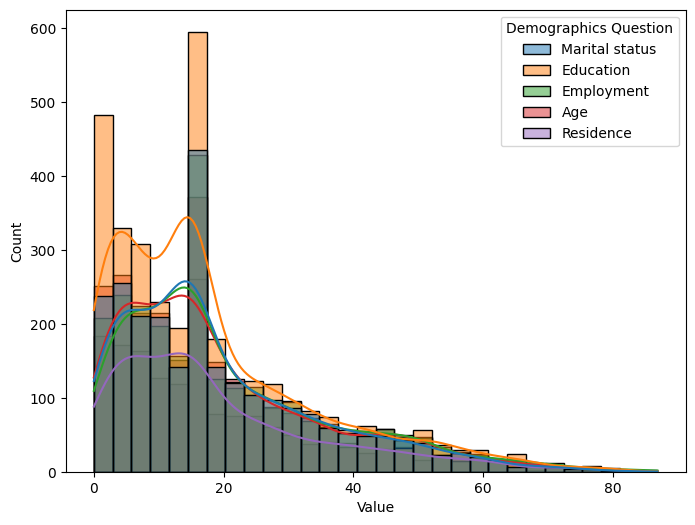

In [36]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Value',kde=True,bins=30,hue='Demographics Question')

#### Insights
- Most values cluster around 20%, meaning the justification is generally low across all demographics.
- Education shows first peak at 0% and second around 15%, which shows that people with education are likely to justify less while less educated show higher justification.
- Residence has a smoother, broader distribution extending further right, suggesting urban–rural differences where one group may justify violence more often.
- Age, Employement and Marital Status have similar curves centred around values around 10% indicating thhese factor influence justification less than compared to residence and education.
- The low tail towards the higher values represents outliers where the justification is unusually high.

#### 4.1 Justification Level By Demographics

#### 4.1.1 By Education Level

In [37]:
edu_df=df[df['Demographics Question']=='Education']
edu_df

,Country,Gender,Demographics Question,Demographics Response,Question,Value
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
13,Afghanistan,F,Education,No education,... if she burns the food,19.1
16,Afghanistan,M,Education,Higher,... if she burns the food,4.5
...,...,...,...,...,...,...
12547,Zimbabwe,M,Education,Secondary,... if she neglects the children,18.0
12548,Zimbabwe,M,Education,Higher,... if she refuses to have sex with him,2.9
12549,Zimbabwe,M,Education,No education,... if she refuses to have sex with him,16.2
12550,Zimbabwe,M,Education,Primary,... if she refuses to have sex with him,8.6


C:\Users\Admin\AppData\Local\Temp\ipykernel_13008\3000194571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=edu_df, x='Demographics Response', y='Value', palette='viridis')


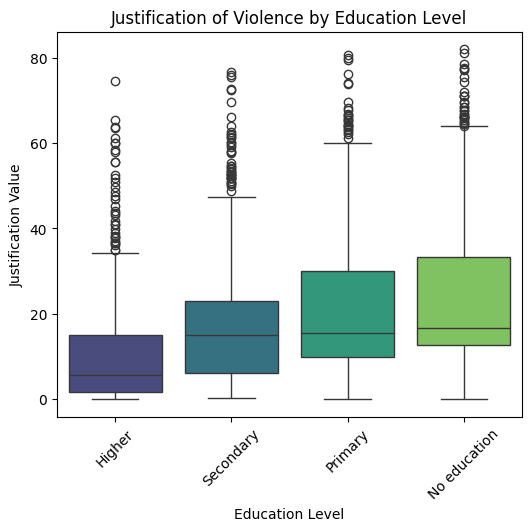

In [39]:
plt.figure(figsize=(6,5))
sns.boxplot(data=edu_df, x='Demographics Response', y='Value', palette='viridis')
plt.title('Justification of Violence by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Justification Value')
plt.xticks(rotation=45)
plt.show()

#### Insight
- Justification decreases with the the education level.

#### 4.1.2 By Age

In [40]:
age_df=df[df['Demographics Question']=='Age']
age_df

,Country,Gender,Demographics Question,Demographics Response,Question,Value
6,Afghanistan,F,Age,15-24,... if she burns the food,17.3
9,Afghanistan,F,Age,25-34,... if she burns the food,18.2
12,Afghanistan,F,Age,35-49,... if she burns the food,18.8
22,Afghanistan,M,Age,25-34,... if she burns the food,8.2
25,Afghanistan,M,Age,35-49,... if she burns the food,8.6
...,...,...,...,...,...,...
12523,Zimbabwe,M,Age,25-34,... if she neglects the children,15.8
12524,Zimbabwe,M,Age,35-49,... if she neglects the children,11.3
12525,Zimbabwe,M,Age,15-24,... if she refuses to have sex with him,8.0
12526,Zimbabwe,M,Age,25-34,... if she refuses to have sex with him,4.7


C:\Users\Admin\AppData\Local\Temp\ipykernel_13008\1950607285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_df, x='Demographics Response', y='Value', palette='viridis')


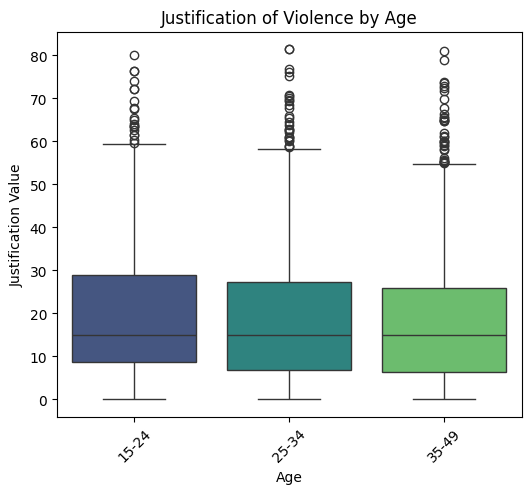

In [41]:
plt.figure(figsize=(6,5))
sns.boxplot(data=age_df, x='Demographics Response', y='Value', palette='viridis')
plt.title('Justification of Violence by Age')
plt.xlabel('Age')
plt.ylabel('Justification Value')
plt.xticks(rotation=45)
plt.show()


#### Insight
- The justification is fairly consistent across all age groups, with only slight increase in the age group 15-24

#### 4.1.3 By Marital Status

In [45]:
mar_df=df[df['Demographics Question']=='Marital status']


C:\Users\Admin\AppData\Local\Temp\ipykernel_13008\1955128797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mar_df, x='Demographics Response', y='Value', palette='viridis')


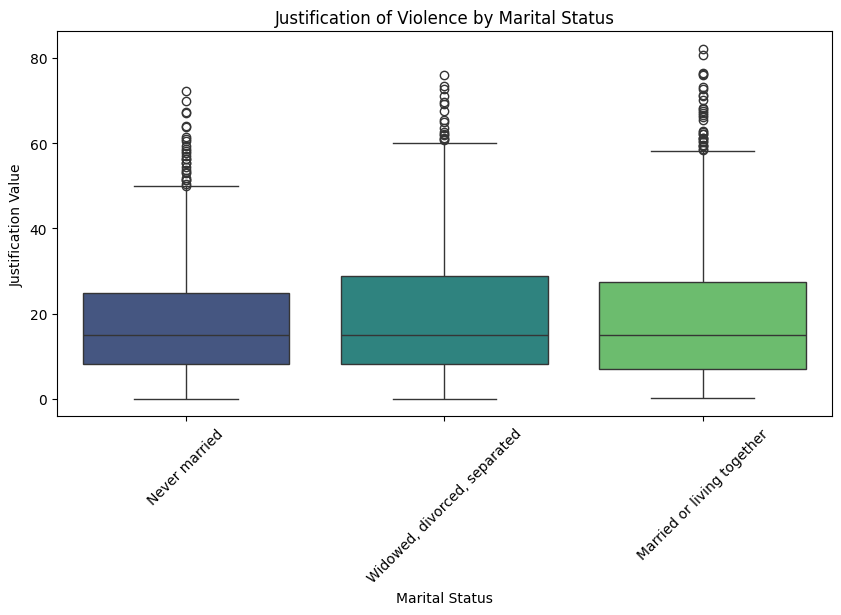

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(data=mar_df, x='Demographics Response', y='Value', palette='viridis')
plt.title('Justification of Violence by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Justification Value')
plt.xticks(rotation=45)
plt.show()


#### Insight
- The justification level is consistent across the marital status with slight increase in married individuals or widowed, divorced, separated individuals

#### 4.1.4 By Employment

C:\Users\Admin\AppData\Local\Temp\ipykernel_13008\2603853320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=emp_df, x='Demographics Response', y='Value', palette='coolwarm')


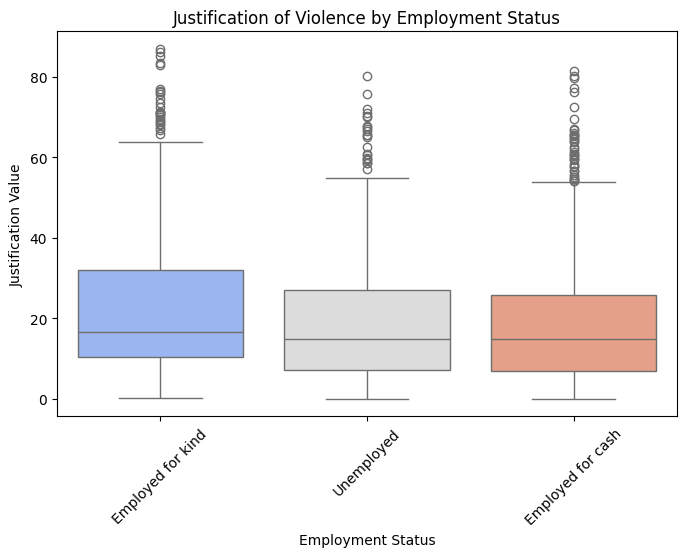

In [50]:
emp_df = df[df['Demographics Question'] == 'Employment']
plt.figure(figsize=(8,5))
sns.boxplot(data=emp_df, x='Demographics Response', y='Value', palette='coolwarm')
plt.title('Justification of Violence by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Justification Value')
plt.xticks(rotation=45)
plt.show()


#### Insight
- People who are employed for kind are usually justifying the violence

#### 4.1.5 By Residence

C:\Users\Admin\AppData\Local\Temp\ipykernel_13008\3416043975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=res_df, x='Demographics Response', y='Value', palette='cubehelix')


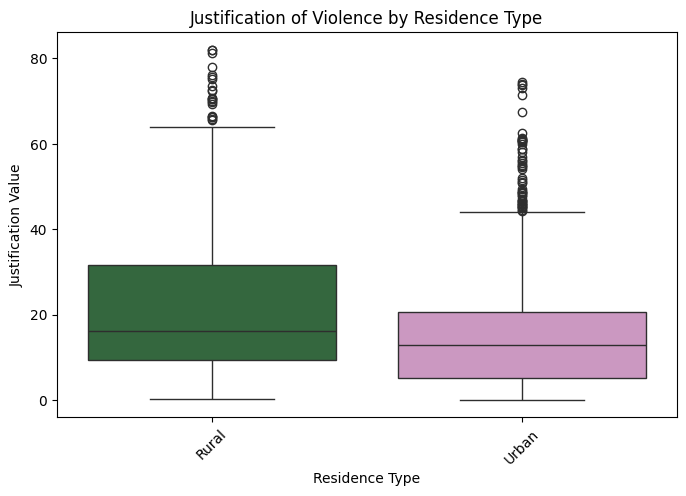

In [51]:
res_df = df[df['Demographics Question'] == 'Residence']
plt.figure(figsize=(8,5))
sns.boxplot(data=res_df, x='Demographics Response', y='Value', palette='cubehelix')
plt.title('Justification of Violence by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Justification Value')
plt.xticks(rotation=45)
plt.show()


#### Insight
- There is a potential urban-rural differences in justification pattern.
- Rural residents tend to justify violence more, possibly due to less awareness.



#### 4.2 Justifcation level based on Gender

C:\Users\Admin\AppData\Local\Temp\ipykernel_13008\302619568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',y='Value',data=df,palette='Set2')


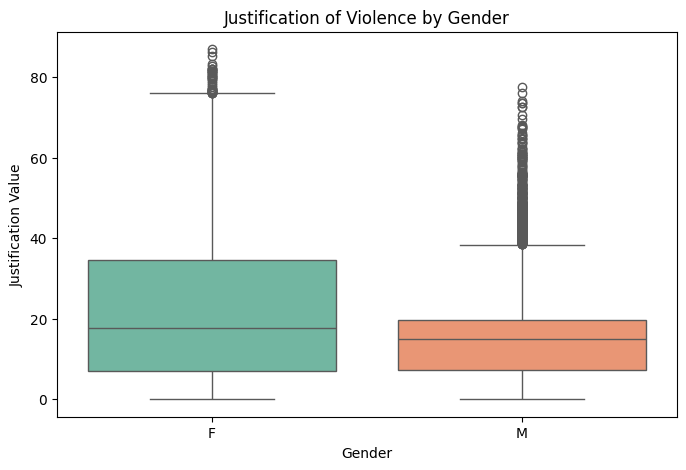

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender',y='Value',data=df,palette='Set2')
plt.title('Justification of Violence by Gender')
plt.ylabel('Justification Value')
plt.xlabel('Gender')
plt.show()

#### Insight
- Women tend to justify violence against women than men, implies the internalized patriarchal norms. 
- It suggests that over the time, due to cultural conditioning, lack of empowerment and societal acceptance of male authority, women may begin to perceive violence as "normal" part of marital life.